In [4]:
from scipy import io as sio
import seaborn as sns
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
sns.set(context="notebook", style="white")


F:\Anaconda3\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)
F:\Anaconda3\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)


In [5]:
mat = sio.loadmat('./data/ex7faces.mat')
mat.keys()

dict_keys(['__header__', '__version__', '__globals__', 'X'])

In [6]:
X = np.array([x.reshape((32, 32)).T.reshape(1024) for x in mat.get('X')])

In [7]:
def plot_n_image(X, n):
    pic_size = int(np.sqrt(X.shape[1]))
    grid_size = int(np.sqrt(n))
    first_n_image = X[:n, :]
    fig, ax_array = plt.subplots(nrows=grid_size, ncols=grid_size,
                                    sharey=True, sharex=True, figsize=(8, 8))
    for r in range(grid_size):
        for c in range(grid_size):
            ax_array[r, c].imshow(
                first_n_image[r*grid_size+c].reshape(pic_size, pic_size))
            plt.xticks(np.array([]))
            plt.yticks(np.array([]))

In [8]:
def covariance_matrix(X):
    m = X.shape[0]
    Sigma = X.T @ X
    return Sigma/m

In [9]:
def normalize(X):
    X_cp = X.copy()
    m, n = X_cp.shape
    for i in range(n):
        X_cp[:, i] = (X_cp[:, i] - X_cp[:, i].mean()) / X_cp[:, i].std()
    return X_cp

In [10]:
def pca(X):
    X_norm = normalize(X)
    Sigma = covariance_matrix(X)
    U, S, V = np.linalg.svd(Sigma)  # U: principle components (n, n)
    return U, S, V

In [11]:
def project_data(X, U, k):
    m, n = X.shape
    if k > n:
        return ValueError('k should be lower dimension of n')
    return X @ U[:, :k]

In [12]:
def recovery_data(Z, U):
    m, n = Z.shape
    if n > U.shape[0]:
        return ValueError('Z dimension is >= U, you should recover from lower dimension to higher')
    return Z @ U[:, :n].T

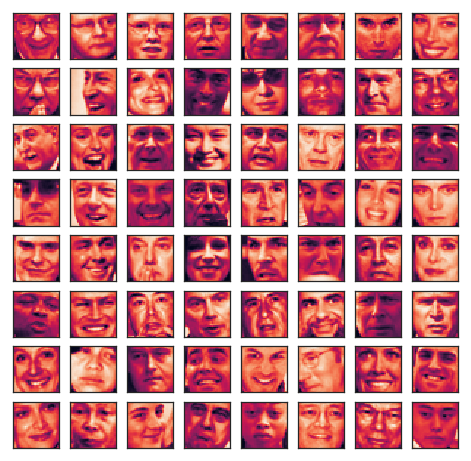

In [13]:
plot_n_image(X, n=64)
plt.show()

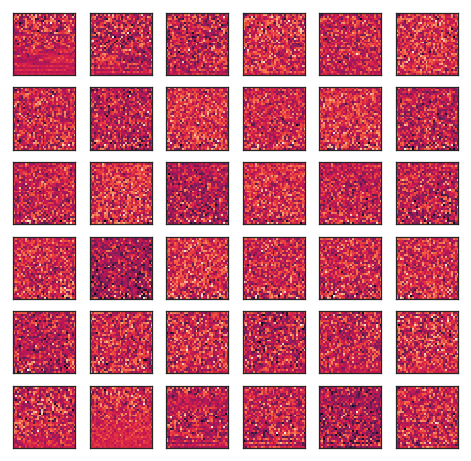

In [14]:
U,S,V =pca(X)
plot_n_image(U, n=36)
plt.show()

In [15]:
U.shape

(1024, 1024)

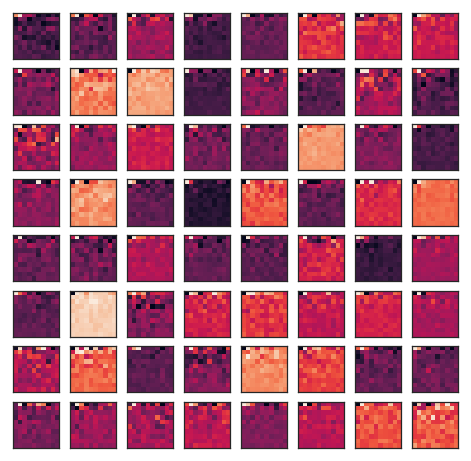

In [16]:
Z = project_data(X, U, k=100)
plot_n_image(Z, n=64)
plt.show()

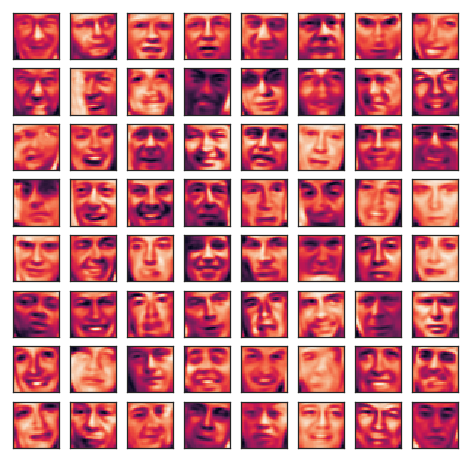

In [17]:
X_recover = recovery_data(Z, U)
plot_n_image(X_recover, n=64)
plt.show()

In [18]:
from sklearn.decomposition import PCA

In [19]:
sk_pca = PCA(n_components=100)

In [20]:
Z = sk_pca.fit_transform(X)

In [23]:
Z.shape

(5000, 100)

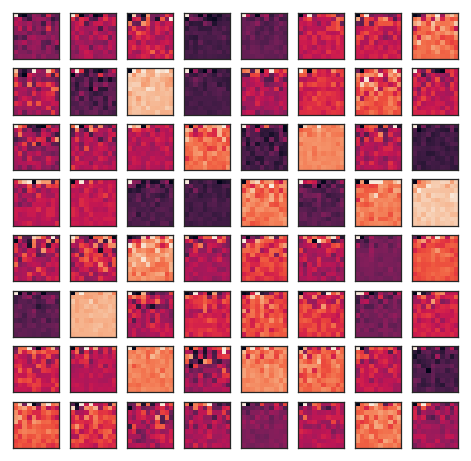

In [25]:
plot_n_image(Z,64)
plt.show()

In [26]:
X_recovery = sk_pca.inverse_transform(Z)

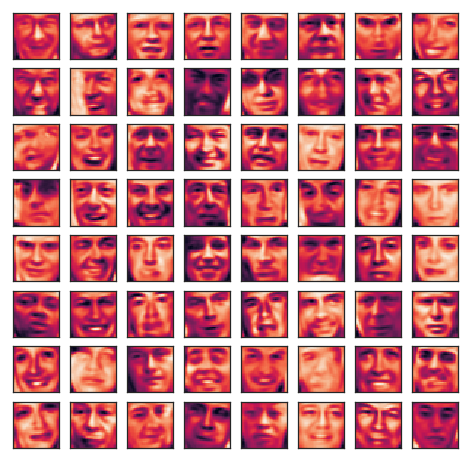

In [27]:
plot_n_image(X_recovery,64)
plt.show()


In [ ]:
plt.